In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# # We will read our CSV file from our Google Drive and store it in a variable called windowsData
# import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/datasets/Windows_processed/windows10_dataset.csv')
# print(df.shape)
# df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(35975, 127)


,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,...,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0,normal
1,1554206319,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,...,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0,normal
2,1554206329,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,...,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0,normal
3,1554206339,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,...,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0,normal
4,1554206349,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,...,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0,normal


In [ ]:
df = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Windows_dataset/windows10_dataset.csv')
print(df.shape)
df.head()

(35975, 127)


,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,...,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0,normal
1,1554206319,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,...,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0,normal
2,1554206329,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,...,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0,normal
3,1554206339,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,...,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0,normal
4,1554206349,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,...,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0,normal


In [5]:
df.drop(['type','ts'], inplace = True, axis = 1)

In [ ]:
# 'Memory Pool Paged Resident Bytes', 'Memory System Driver Total Bytes', 'Memory Standby Cache Core Bytes', 'Memory Long-Term Average Standby Cache Lifetime (s)', 'Memory Pool Nonpaged Bytes', 'Memory Pool Paged Bytes', 

In [ ]:
# df.columns.values.tolist()


In [6]:
df = df.astype(str)

In [7]:
df = df[~df.applymap(lambda x: x.strip()).eq('').any(axis=1)]

In [ ]:
# df = df[~df[['Process_IO Read_Operations_sec']].str.strip().eq('')]

In [8]:
print(df['Process_IO Read_Operations_sec'].str.strip().eq('').value_counts())

False    35214
Name: Process_IO Read_Operations_sec, dtype: int64


In [ ]:
# columns_with_spaces = df.columns[df.apply(lambda x: x.str.isspace().any())]
# print(columns_with_spaces)

In [ ]:
# columns_with_spaces = windows.columns[windows.apply(lambda x: x.str.isspace().any())]
# print(columns_with_spaces)

In [9]:
x = df.drop('label', axis=1)
y = df['label']

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x,y)
fi_col = []
fi = []

for i,column in enumerate(df.drop('label', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, rfc.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(rfc.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature']

The feature importance for Processor_DPC_Rate is : 0.00023800183904823698
The feature importance for Processor_pct_ Idle_Time is : 0.0037557737014396347
The feature importance for Processor_pct_ C3_Time is : 0.0
The feature importance for Processor_pct_ Interrupt_Time is : 0.01109325809900601
The feature importance for Processor_pct_ C2_Time is : 0.0
The feature importance for Processor_pct_ User_Time is : 0.007003465696120148
The feature importance for Processor_pct_ C1_Time is : 0.003531732780548166
The feature importance for Processor_pct_ Processor_Time is : 0.0023408520421814415
The feature importance for Processor_C1_ransitions_sec is : 0.0032025059848593295
The feature importance for Processor_pct_ DPC_Time is : 0.0006186505878097562
The feature importance for Processor_C2_ransitions_sec is : 0.0
The feature importance for Processor_pct_ Privileged_Time is : 0.0019918020724574085
The feature importance for Processor_C3_ransitions_sec is : 0.0
The feature importance for Processor

In [ ]:
pd.set_option('display.max_rows', 124)
fi_df.head(124)

,index,Feature,Feature Importance
0,28,Process_Virtual_Bytes,0.062489
1,42,Process_Handle Count,0.061291
2,15,Process_Pool_Paged Bytes,0.059606
3,86,Memory Standby Cache Core Bytes,0.044732
4,37,Process_Thread Count,0.043183
5,104,LogicalDisk(_Total) pct_ Free Space,0.042040
6,92,Memory Free System Page Table Entries,0.041631
7,78,Memory Pool Nonpaged Bytes,0.039875
8,22,Process_Virtual_Bytes Peak,0.034005
9,43,Network_I(Intel R _82574L_GNC)TCP_APS,0.033124


In [ ]:
pd.set_option('display.max_rows', 124)
fi_df.head(124)

,index,Feature,Feature Importance
0,28,Process_Virtual_Bytes,0.062489
1,42,Process_Handle Count,0.061291
2,15,Process_Pool_Paged Bytes,0.059606
3,86,Memory Standby Cache Core Bytes,0.044732
4,37,Process_Thread Count,0.043183
5,104,LogicalDisk(_Total) pct_ Free Space,0.042040
6,92,Memory Free System Page Table Entries,0.041631
7,78,Memory Pool Nonpaged Bytes,0.039875
8,22,Process_Virtual_Bytes Peak,0.034005
9,43,Network_I(Intel R _82574L_GNC)TCP_APS,0.033124


**Feature importance based on random forest**

In [ ]:
df = df.loc[:, ['LogicalDisk(_Total) Free Megabytes' , 'LogicalDisk(_Total) pct_ Free Space' , 'Memory Pool Paged Resident Bytes', 'Memory System Driver Total Bytes' ,'Memory Committed Bytes' , 'Memory Free System Page Table Entries', 'Memory Standby Cache Core Bytes','Memory System Driver Resident Bytes','Memory Standby Cache Normal Priority Bytes', 'Memory Long-Term Average Standby Cache Lifetime (s)', 'Memory Free System Page Table Entries','Memory System Cache Resident Bytes' , 'Memory Pool Nonpaged Bytes', 'Memory Cache Bytes', 'Memory Pool Paged Bytes','Memory Cache Bytes Peak', 'Network_I(Intel R _82574L_GNC) Bytes Sent sec' ,'Network_I(Intel R _82574L_GNC)TCP_APS','Process_IO Read Bytes_sec','Process_Handle Count','Process_IO Data Operations_sec','Process_Thread Count','Process_Pool Nonpaged Bytes','Process_Working Set','Process_Virtual_Bytes','Process_pct_ User_Time','Process_Virtual_Bytes Peak','Process_Working_Set_Peak','Process_IO_Write Operations_sec' ,'Process_Pool_Paged Bytes','Process_IO Read_Operations_sec', 'label' ]]

In [ ]:
df = df.astype(float)

<AxesSubplot: >

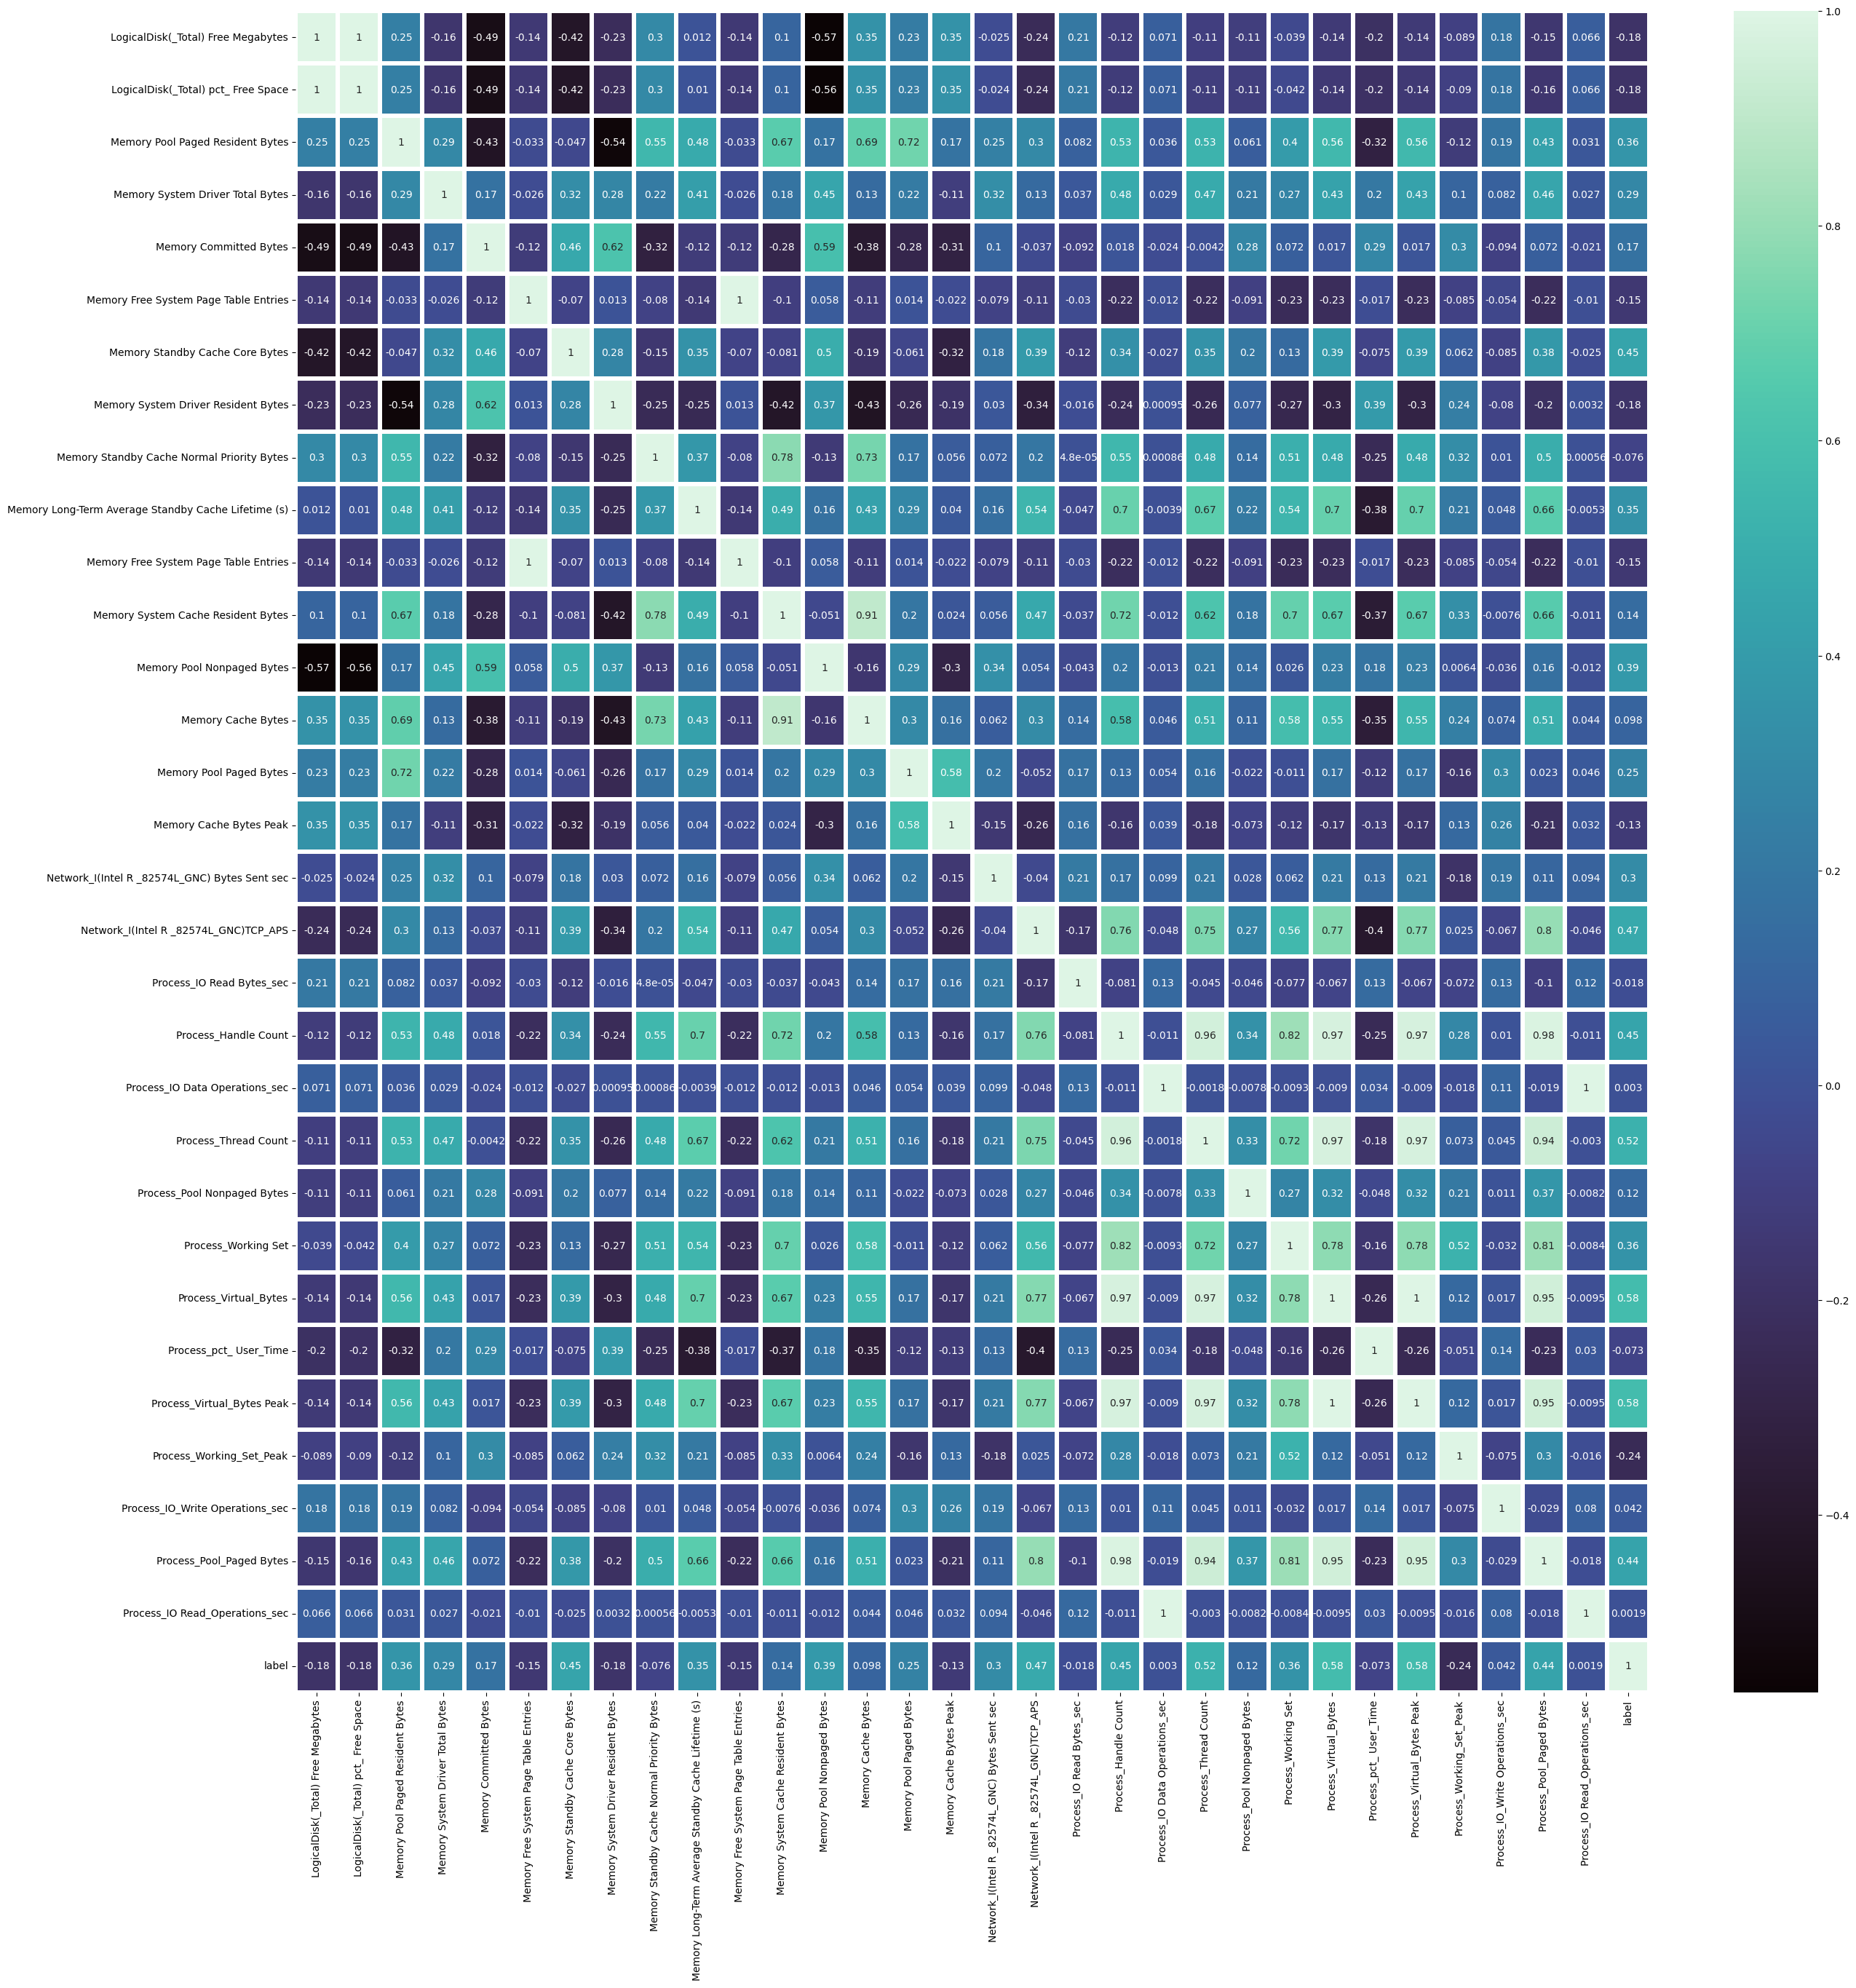

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

In [ ]:
df.drop('Memory Free System Page Table Entries', inplace = True, axis = 1)

<AxesSubplot: >

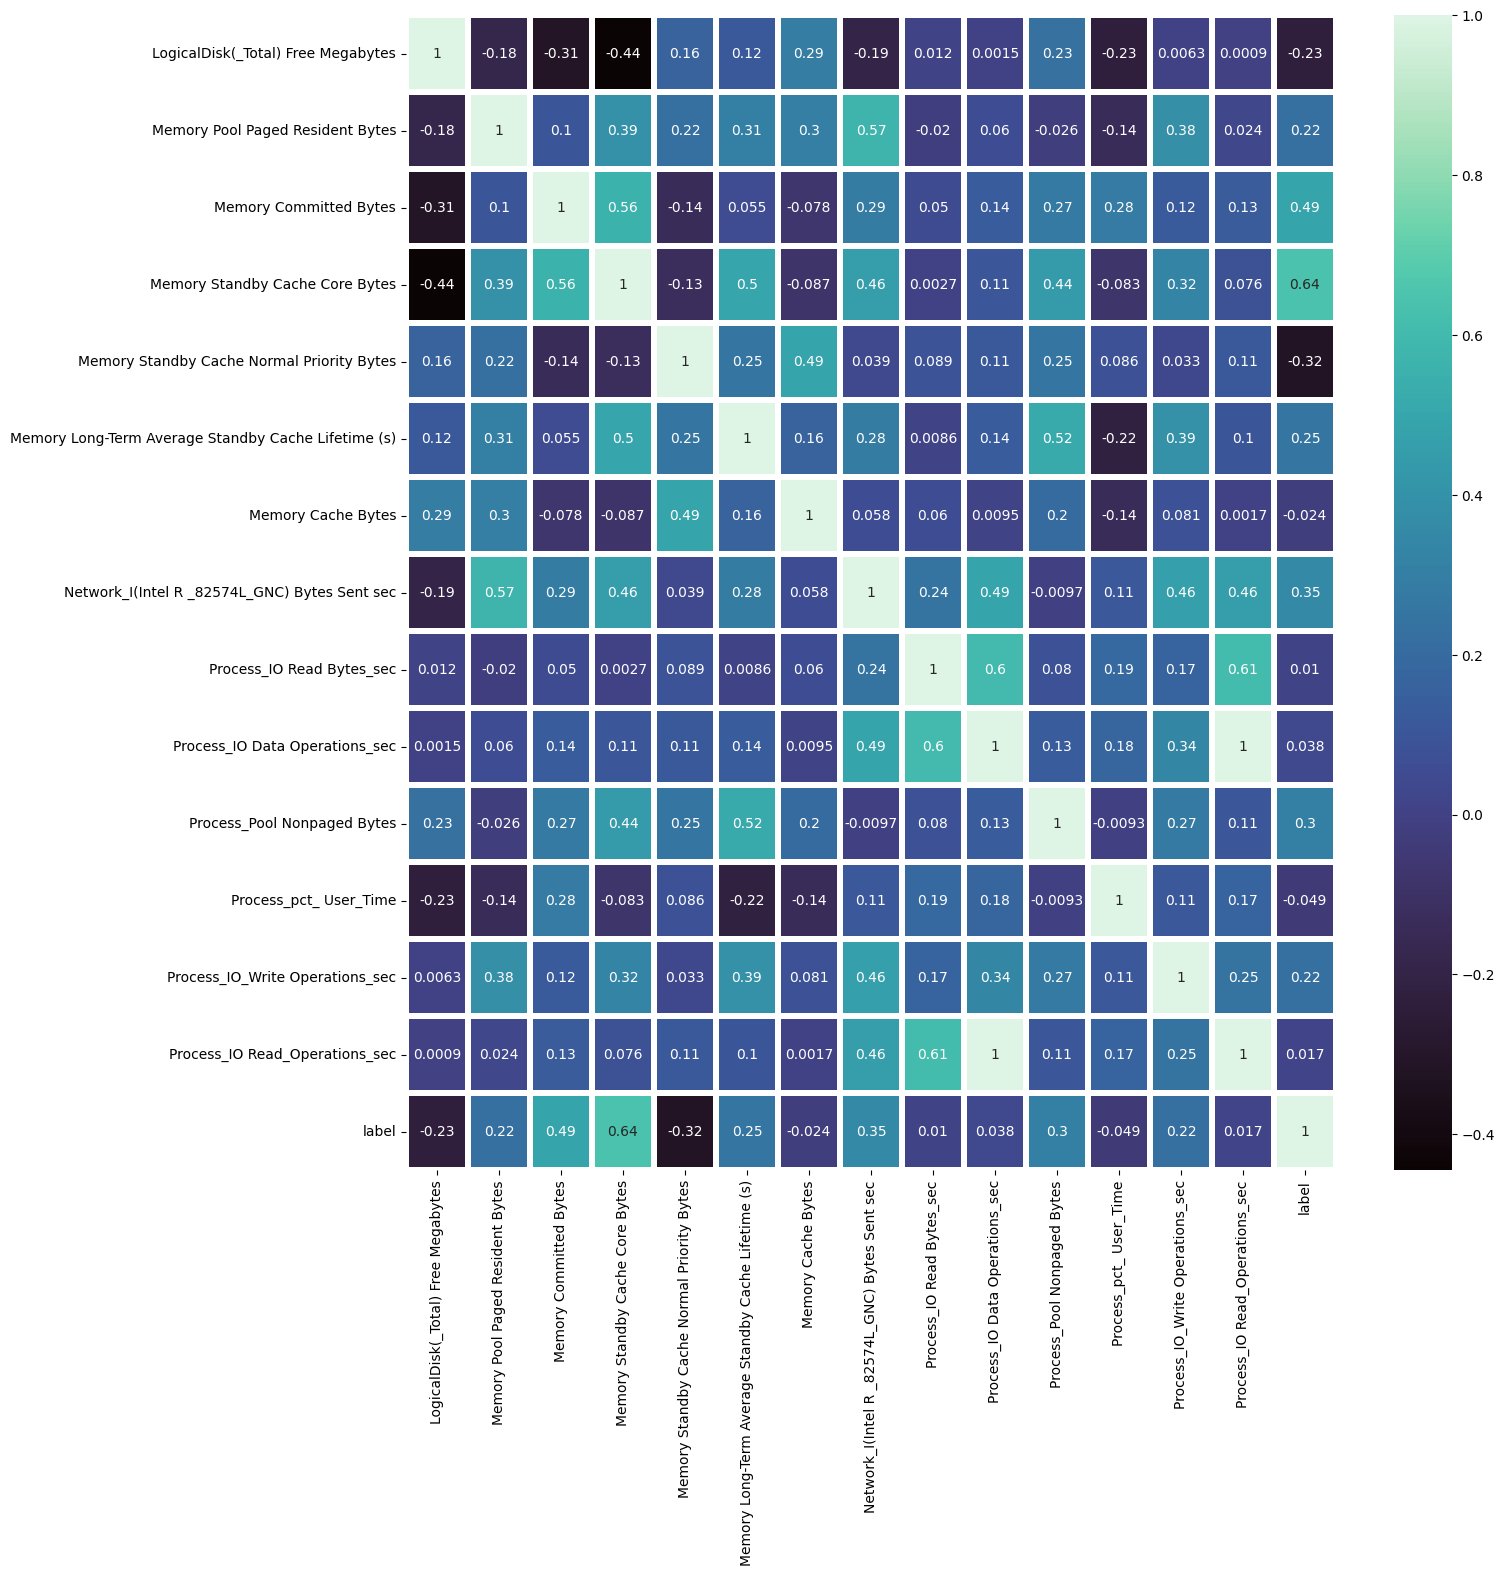

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

In [ ]:
# df = df.loc[:, ['Memory Pool Paged Resident Bytes','Memory System Driver Total Bytes', 'Memory Standby Cache Core Bytes', 'Memory Long-Term Average Standby Cache Lifetime (s)','Memory Pool Nonpaged Bytes','Memory Pool Paged Bytes','Network_I(Intel R _82574L_GNC) Bytes Sent sec' ,'Network_I(Intel R _82574L_GNC)TCP_APS', 'Process_Handle Count','Process_Thread Count','Process_Working Set','Process_Virtual_Bytes','Process_Virtual_Bytes Peak','Process_Working_Set_Peak', 'Process_Pool_Paged Bytes', 'label']] 
# #---corelation heatmap---- 
# import seaborn as sns
# plt.figure(figsize=(20, 15)) 
# sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

In [ ]:
# import matplotlib.pyplot as plt
# columns = df.columns
# for col in columns:
#     print("col: ", col)
#     plt.scatter(df.index, df[col])
#     plt.show()

In [ ]:
df.drop(['Memory System Driver Total Bytes',
'Memory System Driver Resident Bytes',
'Memory System Cache Resident Bytes',
'Memory Pool Nonpaged Bytes',
'Memory Pool Paged Bytes',
'Memory Cache Bytes Peak',
'Network_I(Intel R _82574L_GNC)TCP_APS',
'Process_Handle Count',
'Process_Thread Count',
'Process_Working Set',
'Process_Virtual_Bytes',
'Process_Virtual_Bytes Peak',
'Process_Working_Set_Peak',
'Process_Pool_Paged Bytes'], inplace = True, axis = 1)

In [ ]:
# import matplotlib.pyplot as plt
# columns = df.columns
# for col in columns:
#     print("col: ", col)
#     plt.scatter(df.index, df[col])
#     plt.show()

In [ ]:
df.head()

,LogicalDisk(_Total) Free Megabytes,LogicalDisk(_Total) pct_ Free Space,Memory Pool Paged Resident Bytes,Memory Committed Bytes,Memory Standby Cache Core Bytes,Memory Standby Cache Normal Priority Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Cache Bytes,Network_I(Intel R _82574L_GNC) Bytes Sent sec,Process_IO Read Bytes_sec,Process_IO Data Operations_sec,Process_Pool Nonpaged Bytes,Process_pct_ User_Time,Process_IO_Write Operations_sec,Process_IO Read_Operations_sec,label
0,167984.0,82.156219,83619840.0,3.460387e+09,157052928.0,95240192.0,48.0,18944000.0,221.720966,8.755815e+04,293.825345,2447032.0,122.055019,282.909543,10.915802,0.0
1,167984.0,82.156219,83984384.0,3.459990e+09,157036544.0,94769152.0,48.0,16445440.0,210.620362,7.339650e+04,239.723175,2451920.0,118.289188,230.722305,9.000870,0.0
2,167984.0,82.156219,79081472.0,3.522941e+09,113893376.0,23834624.0,46.0,14024704.0,209.808634,3.775767e+06,694.779399,2408264.0,92.055880,373.889746,320.889654,0.0
3,167984.0,82.156219,52133888.0,3.688444e+09,2453504.0,63152128.0,29.0,5312512.0,262.663637,4.887542e+06,677.628039,2318640.0,95.612437,296.474808,381.153231,0.0
4,167984.0,82.156219,29245440.0,3.688333e+09,2338816.0,52461568.0,31.0,2392064.0,210.484576,4.646488e+06,753.786644,2248992.0,83.590059,306.531906,447.254738,0.0


In [ ]:
#Mention column name along with range
temp = df[(df['LogicalDisk(_Total) Free Megabytes'] >= 165000) & (df['LogicalDisk(_Total) Free Megabytes']<= 175000)] 
#Mention Column name along with column index
df['LogicalDisk(_Total) Free Megabytes'] = temp.iloc[:,0]

#Mention column name along with range
temp = df[(df['LogicalDisk(_Total) pct_ Free Space'] >= 80) & (df['LogicalDisk(_Total) pct_ Free Space']<= 84)] 
#Mention Column name along with column index
df['LogicalDisk(_Total) pct_ Free Space'] = temp.iloc[:,1]

#Mention column name along with range
temp = df[(df['Memory Pool Paged Resident Bytes'] >= .75*10**8) & (df['Memory Pool Paged Resident Bytes']<= 2*10**8)] 
#Mention Column name along with column index
df['Memory Pool Paged Resident Bytes'] = temp.iloc[:,2]

#Mention column name along with range
temp = df[(df['Memory Committed Bytes'] >= 0.2*10**10) & (df['Memory Committed Bytes']<= 0.6*10**10)] 
#Mention Column name along with column index
df['Memory Committed Bytes'] = temp.iloc[:,3]


#Mention column name along with range
temp = df[(df['Memory Standby Cache Core Bytes'] >= 1*10**8) & (df['Memory Standby Cache Core Bytes']<= 2.25*10**8)] 
#Mention Column name along with column index
df['Memory Standby Cache Core Bytes'] = temp.iloc[:,4]


#Mention column name along with range
temp = df[(df['Memory Standby Cache Normal Priority Bytes'] >= 0) & (df['Memory Standby Cache Normal Priority Bytes']<= 0.5*10**9)] 
#Mention Column name along with column index
df['Memory Standby Cache Normal Priority Bytes'] = temp.iloc[:,5]


df['Memory Long-Term Average Standby Cache Lifetime (s)'] = df['Memory Long-Term Average Standby Cache Lifetime (s)']

#Mention column name along with range
temp = df[(df['Memory Cache Bytes'] >= 0) & (df['Memory Cache Bytes']<= 2*10**8)] 
#Mention Column name along with column index
df['Memory Cache Bytes'] = temp.iloc[:,7]

#Mention column name along with range
temp = df[(df['Network_I(Intel R _82574L_GNC) Bytes Sent sec'] >= 0) & (df['Network_I(Intel R _82574L_GNC) Bytes Sent sec']<= 100000)] 
#Mention Column name along with column index
df['Network_I(Intel R _82574L_GNC) Bytes Sent sec'] = temp.iloc[:,8]


#Mention column name along with range
temp = df[(df['Process_IO Read Bytes_sec'] >= 0) & (df['Process_IO Read Bytes_sec']<= 2*10**7)] 
#Mention Column name along with column index
df['Process_IO Read Bytes_sec'] = temp.iloc[:,9]

#Mention column name along with range
temp = df[(df['Process_IO Data Operations_sec'] >= 0) & (df['Process_IO Data Operations_sec']<= 10000)] 
#Mention Column name along with column index
df['Process_IO Data Operations_sec'] = temp.iloc[:,10]


#Mention column name along with range
temp = df[(df['Process_Pool Nonpaged Bytes'] >= 0) & (df['Process_Pool Nonpaged Bytes']<= 4*10**6)] 
#Mention Column name along with column index
df['Process_Pool Nonpaged Bytes'] = temp.iloc[:,11]


#Mention column name along with range
temp = df[(df['Process_pct_ User_Time'] >= 0) & (df['Process_pct_ User_Time']<= 100)] 
#Mention Column name along with column index
df['Process_pct_ User_Time'] = temp.iloc[:,12]


#Mention column name along with range
temp = df[(df['Process_IO_Write Operations_sec'] >= 0) & (df['Process_IO_Write Operations_sec']<= 500)] 
#Mention Column name along with column index
df['Process_IO_Write Operations_sec'] = temp.iloc[:,13]


#Mention column name along with range
temp = df[(df['Process_IO Read_Operations_sec'] >= 0) & (df['Process_IO Read_Operations_sec']<= 8000)] 
#Mention Column name along with column index
df['Process_IO Read_Operations_sec'] = temp.iloc[:,14]

In [ ]:
# import matplotlib.pyplot as plt
# columns = df.columns
# for col in columns:
#     print("col: ", col)
#     plt.scatter(df.index, df[col])
#     plt.show()

In [ ]:
df.isnull().sum().sum()

25933

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum().sum()

0

<AxesSubplot: >

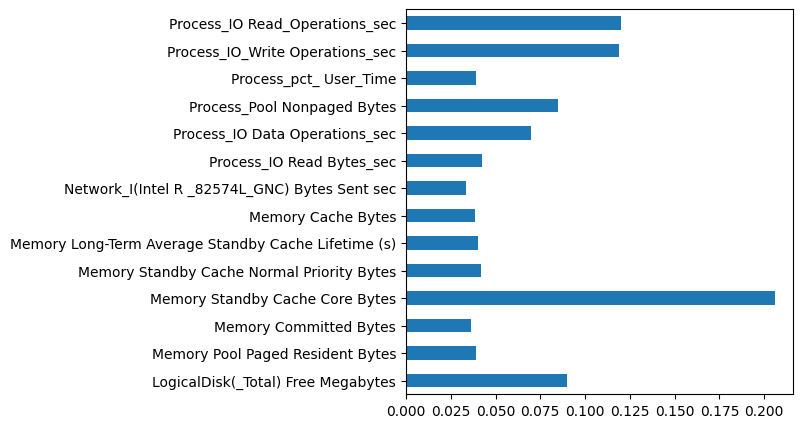

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

x = df.drop('label', axis=1)
y = df['label']

model = RandomForestClassifier()
model.fit(x, y)

(pd.Series(model.feature_importances_, index=x.columns)
   # .nlargest(4)
   .plot(kind='barh',figsize = (5, 5) ))

<AxesSubplot: >

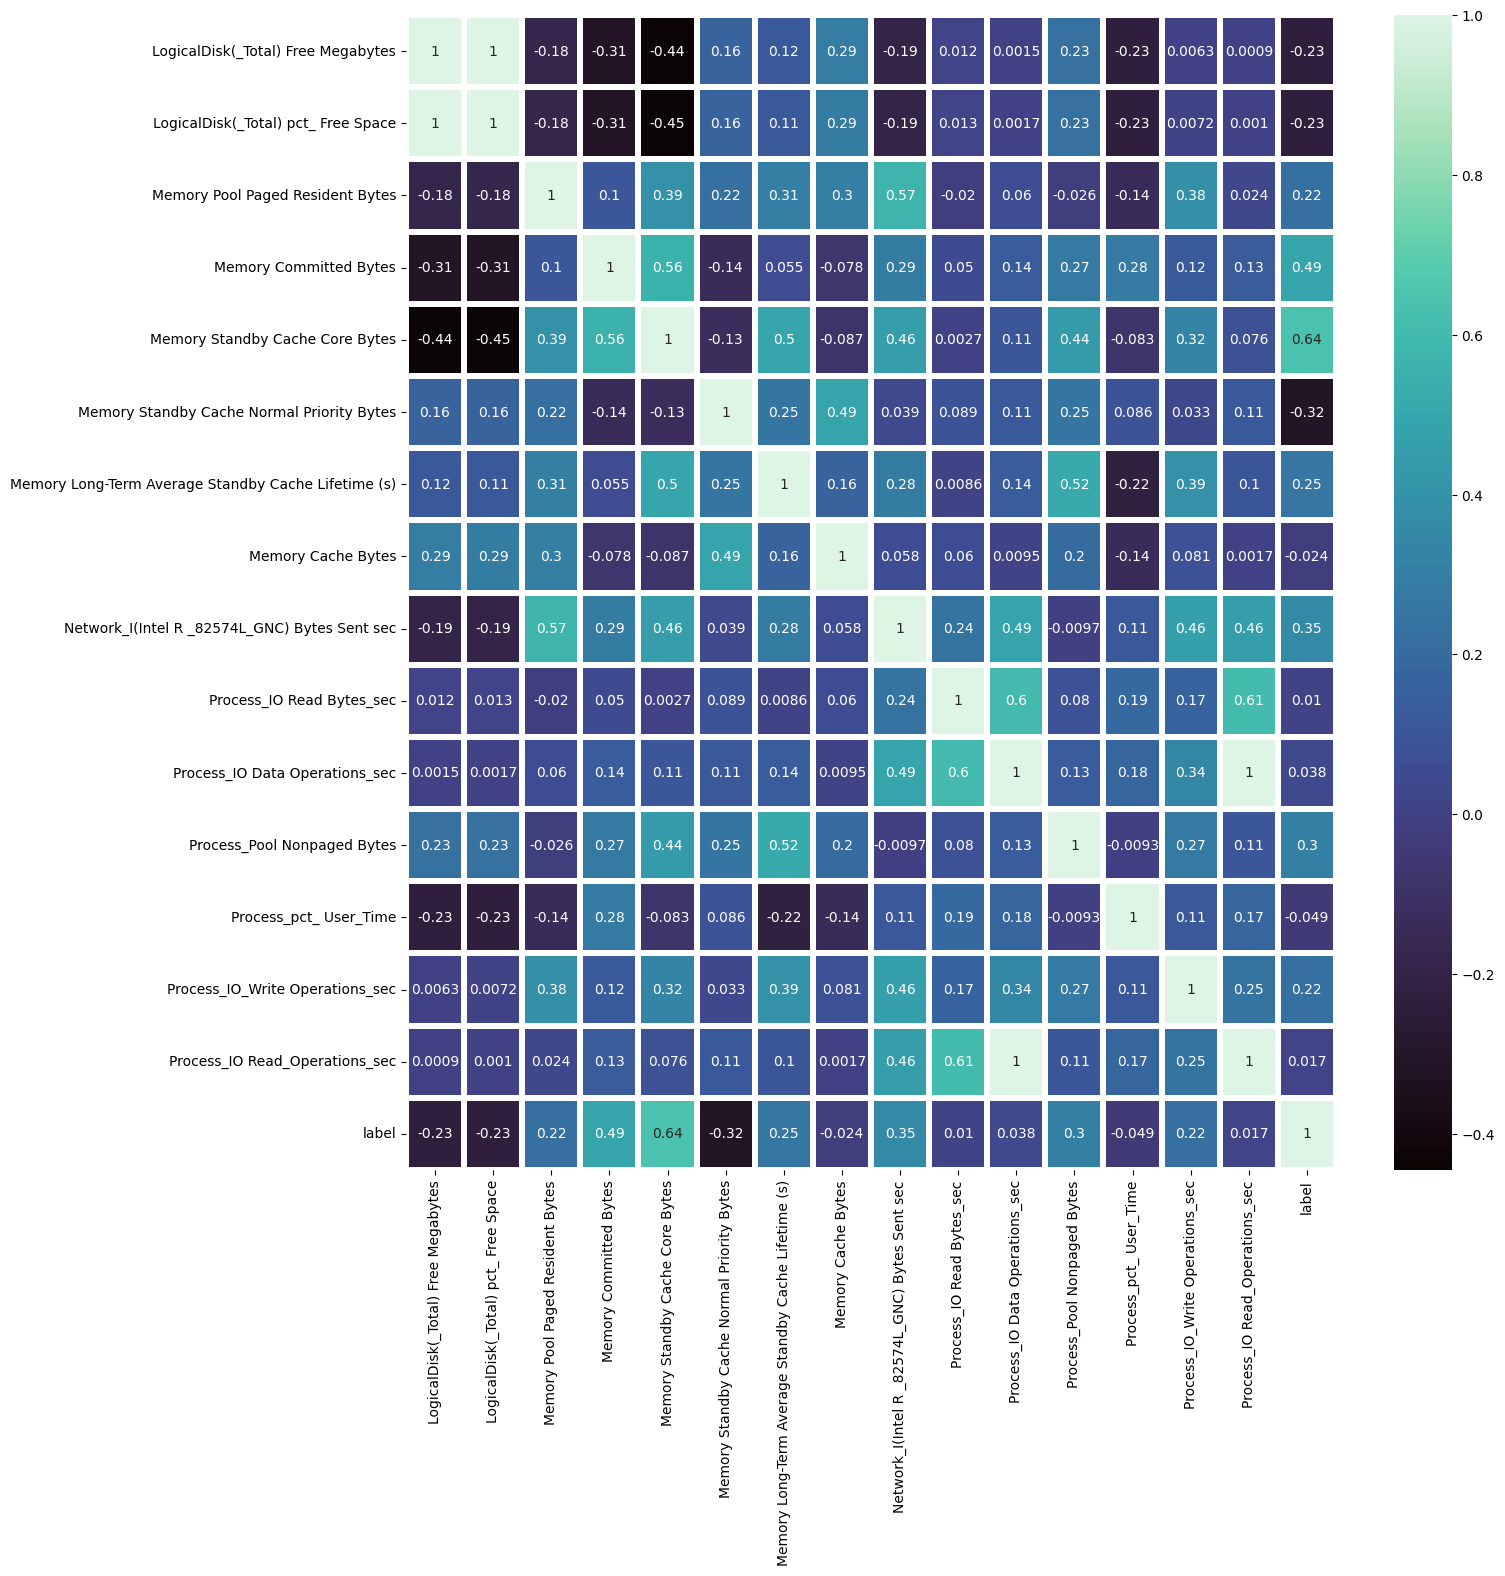

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

In [ ]:
df.drop('LogicalDisk(_Total) pct_ Free Space', axis = 1, inplace = True)

In [ ]:
df_scaled = df

In [ ]:
x_scaled = df_scaled.drop('label', axis=1)
y_scaled = df_scaled['label']

In [ ]:
df_scaled.head(10)

,LogicalDisk(_Total) Free Megabytes,Memory Pool Paged Resident Bytes,Memory Committed Bytes,Memory Standby Cache Core Bytes,Memory Standby Cache Normal Priority Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Cache Bytes,Network_I(Intel R _82574L_GNC) Bytes Sent sec,Process_IO Read Bytes_sec,Process_IO Data Operations_sec,Process_Pool Nonpaged Bytes,Process_pct_ User_Time,Process_IO_Write Operations_sec,Process_IO Read_Operations_sec,label
2,167984.0,79081472.0,3.522941e+09,113893376.0,23834624.0,46.0,14024704.0,209.808634,3.775767e+06,694.779399,2408264.0,92.055880,373.889746,320.889654,0.0
58,167789.0,75649024.0,3.156525e+09,163835904.0,87298048.0,68.0,10297344.0,227.154148,3.518996e+04,97.351778,2034952.0,34.741750,47.073390,50.278387,0.0
59,167789.0,78942208.0,3.149775e+09,163803136.0,88109056.0,69.0,10911744.0,242.996323,3.449038e+04,96.698537,2035696.0,38.593336,47.899275,48.799262,0.0
60,167789.0,81887232.0,3.157340e+09,163770368.0,79532032.0,68.0,11735040.0,237.597537,3.392755e+04,92.399042,2035248.0,37.030571,46.199521,46.199521,0.0
61,167789.0,84430848.0,3.168883e+09,163241984.0,73543680.0,66.0,12251136.0,1539.629711,2.957457e+04,84.070572,1948400.0,39.158494,40.038360,44.032212,0.0
62,167789.0,90017792.0,3.168973e+09,163225600.0,71020544.0,63.0,11264000.0,248.786569,3.374313e+04,91.442084,1948960.0,42.409767,45.670964,45.771120,0.0
63,167789.0,91901952.0,3.183190e+09,163225600.0,71024640.0,61.0,9953280.0,263.791382,3.596828e+04,100.743946,1950864.0,36.974123,49.822823,50.921122,0.0
64,167789.0,102043648.0,3.179278e+09,162885632.0,69582848.0,58.0,10588160.0,243.371296,3.341959e+04,95.746074,1950832.0,40.373880,47.672731,48.073342,0.0
65,167789.0,100126720.0,3.183841e+09,162885632.0,65732608.0,56.0,11550720.0,225.246700,3.565557e+04,99.444022,1950624.0,38.533394,49.222794,50.221228,0.0
66,167789.0,94240768.0,3.189535e+09,162893824.0,66048000.0,55.0,10989568.0,254.899690,3.604226e+04,99.299879,1950480.0,38.125308,49.699940,49.599940,0.0


In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
x.head()

,LogicalDisk(_Total) Free Megabytes,Memory Pool Paged Resident Bytes,Memory Committed Bytes,Memory Standby Cache Core Bytes,Memory Standby Cache Normal Priority Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Cache Bytes,Network_I(Intel R _82574L_GNC) Bytes Sent sec,Process_IO Read Bytes_sec,Process_IO Data Operations_sec,Process_Pool Nonpaged Bytes,Process_pct_ User_Time,Process_IO_Write Operations_sec,Process_IO Read_Operations_sec
2,167984.0,79081472.0,3.522941e+09,113893376.0,23834624.0,46.0,14024704.0,209.808634,3.775767e+06,694.779399,2408264.0,92.055880,373.889746,320.889654
58,167789.0,75649024.0,3.156525e+09,163835904.0,87298048.0,68.0,10297344.0,227.154148,3.518996e+04,97.351778,2034952.0,34.741750,47.073390,50.278387
59,167789.0,78942208.0,3.149775e+09,163803136.0,88109056.0,69.0,10911744.0,242.996323,3.449038e+04,96.698537,2035696.0,38.593336,47.899275,48.799262
60,167789.0,81887232.0,3.157340e+09,163770368.0,79532032.0,68.0,11735040.0,237.597537,3.392755e+04,92.399042,2035248.0,37.030571,46.199521,46.199521
61,167789.0,84430848.0,3.168883e+09,163241984.0,73543680.0,66.0,12251136.0,1539.629711,2.957457e+04,84.070572,1948400.0,39.158494,40.038360,44.032212


# Without Oversampling

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=15, shuffle = True, random_state=3)

In [ ]:
df.shape

(14456, 15)

In [ ]:
# --------------------------Random Forest -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1, bootstrap= False, criterion= 'gini', max_depth= 10, max_features= 2, min_samples_leaf= 2, n_estimators= 200)
rfc.fit(x_train, y_train) #Training the model
y_pred_rfc = rfc.predict(x_test)
# print(y_pred_rfc)# printing predictions

#Accuracy Score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, x, y, cv=8)
print("Cross Validation Score Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.metrics import accuracy_score
rfcAccuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print("Accuracy of rfc: ",rfcAccuracy)

#F1 Score

from sklearn.metrics import f1_score
rfcF1 = round(f1_score(y_test, y_pred_rfc)*100,2)
print("f1_score of rfc: ",rfcF1)

#AUC Score

from sklearn.metrics import roc_auc_score
rfcAuc = round(roc_auc_score (y_test, y_pred_rfc)*100,2)
print('AUC Score of rfc:',rfcAuc)

Cross Validation Score Accuracy: 0.88 (+/- 0.23)
Accuracy of rfc:  96.16
f1_score of rfc:  96.68
AUC Score of rfc: 95.83


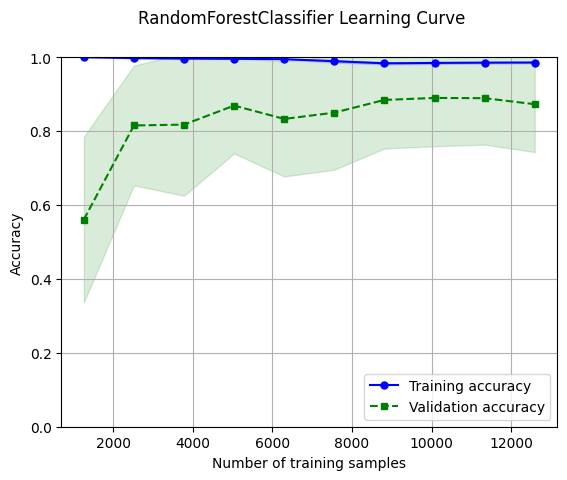

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

log_reg = rfc


train_sizes, train_scores, test_scores = learning_curve(estimator=log_reg,
                                                       X=x_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=15,
                                                       n_jobs=-1)

# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.suptitle('RandomForestClassifier Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1.0])
plt.show()

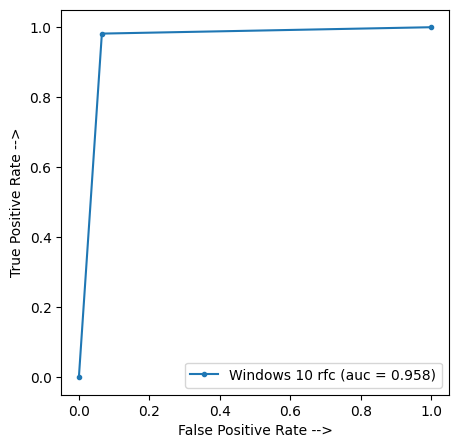

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Windows 10 rfc (auc = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

[Text(0.5, 1.0, 'RandomForestClassifier Confusion Matrix')]

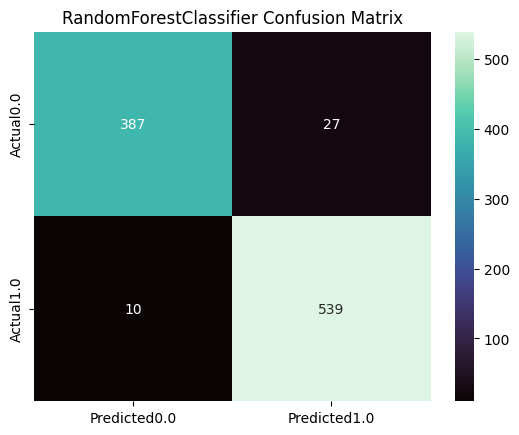

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako', ).set(title = 'RandomForestClassifier Confusion Matrix')

plot(y_test, y_pred_rfc)

In [ ]:
# from interpret.blackbox import LimeTabular
# from interpret import show
# # dtc = DecisionTreeClassifier()
# # dtc.fit(x_train, y_train)
# # y_pred = dtc.predict(x_test)
# # print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# # print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# # %% Apply lime
# # Initilize Lime for Tabular data
# lime = LimeTabular(predict_fn=rfc.predict_proba, 
#                    data=x_train, 
#                    random_state=1)
# # Get local explanations
# lime_local = lime.explain_local(x_test[-200:], 
#                                 y_test[-200:], 
#                                 name='LIME')
# show(lime_local)

In [ ]:
# --------------------------Decision Tree -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
# print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, x, y, cv=8)
print("Cross Validation Score Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.metrics import accuracy_score
dtcAccuracy = round(accuracy_score(y_test, y_pred_dtc)*100,2)
print("Accuracy of Decisiontree: ",dtcAccuracy)

#F1 Score

from sklearn.metrics import f1_score
dtcF1 = round(f1_score(y_test, y_pred_dtc)*100,2)
print("f1_score of Decisiontree: ",dtcF1)

#AUC Score

from sklearn.metrics import roc_auc_score
dtcAuc = round(roc_auc_score (y_test, y_pred_dtc)*100,2)
print('AUC Score of Decision Tree:',dtcAuc)

Cross Validation Score Accuracy: 0.87 (+/- 0.22)
Accuracy of Decisiontree:  94.81
f1_score of Decisiontree:  95.43
AUC Score of Decision Tree: 94.76


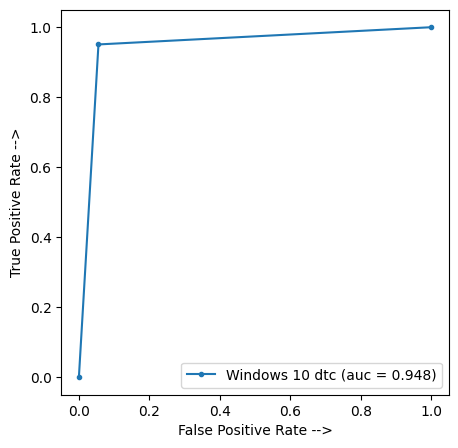

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Windows 10 dtc (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

[Text(0.5, 1.0, 'Decision Tree Confusion Matrix')]

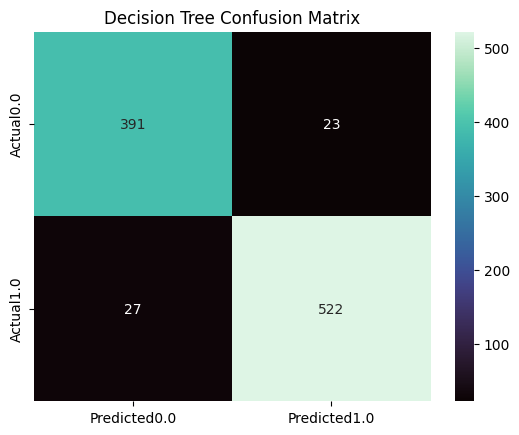

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako', ).set(title = 'Decision Tree Confusion Matrix')

plot(y_test, y_pred_dtc)

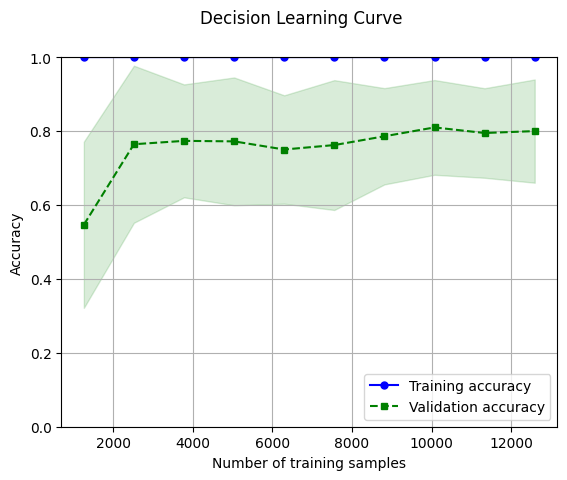

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

log_reg = dtc


train_sizes, train_scores, test_scores = learning_curve(estimator=log_reg,
                                                       X=x_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=15,
                                                       n_jobs=-1)

# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.suptitle('Decision Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1.0])
plt.show()

In [ ]:
# from interpret.blackbox import LimeTabular
# from interpret import show
# # dtc = DecisionTreeClassifier()
# # dtc.fit(x_train, y_train)
# # y_pred = dtc.predict(x_test)
# # print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# # print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# # %% Apply lime
# # Initilize Lime for Tabular data
# lime = LimeTabular(predict_fn=dtc.predict_proba, 
#                    data=x_train, 
#                    random_state=1)
# # Get local explanations
# lime_local = lime.explain_local(x_test[-200:], 
#                                 y_test[-200:], 
#                                 name='LIME')
# show(lime_local)

In [ ]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
#fit scaler to train set, it will learn parameters
scaler.fit(x_train)
#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#converting from numpy
x_train= pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test= pd.DataFrame(x_test_scaled, columns=x_test.columns)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13, p=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
# print(y_pred_knn)# printing predictions

#Accuracy Score

from sklearn.metrics import accuracy_score
knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN: ",knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN: ",knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
print('AUC Score of KNN:',knnAuc)

Accuracy of KNN:  95.33
f1_score of KNN:  95.96
AUC Score of KNN: 95.01


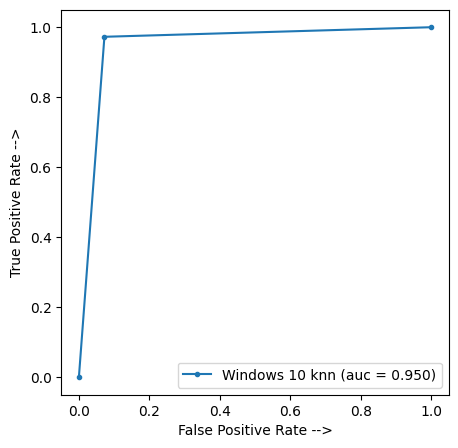

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='Windows 10 knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

[Text(0.5, 1.0, 'K-Nearest Neighbour Confusion Matrix')]

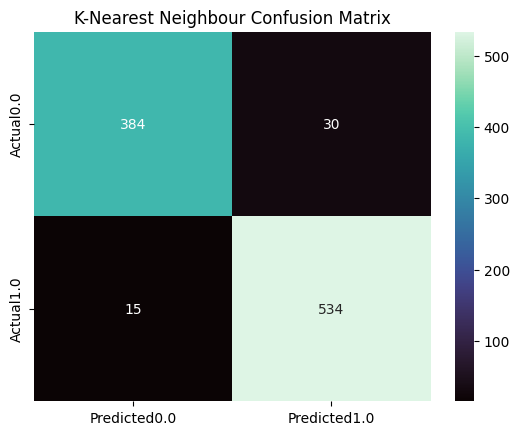

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako', ).set(title = 'K-Nearest Neighbour Confusion Matrix')

plot(y_test, y_pred_knn)

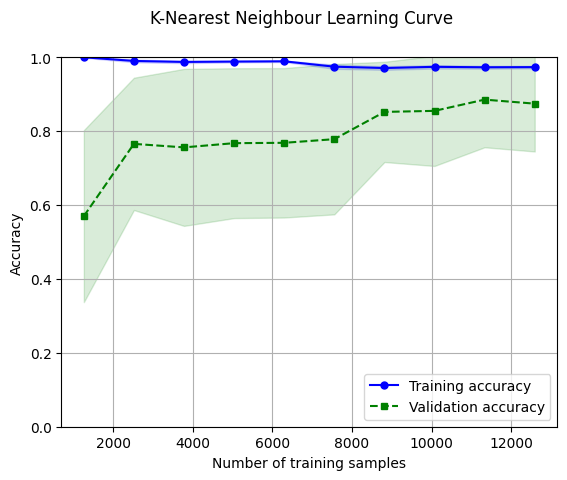

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

log_reg = knn

train_sizes, train_scores, test_scores = learning_curve(estimator=log_reg,
                                                       X=x_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=15,
                                                       n_jobs=-1)

# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.suptitle('K-Nearest Neighbour Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1.0])
plt.show()

In [ ]:
# from interpret.blackbox import LimeTabular
# from interpret import show
# # dtc = DecisionTreeClassifier()
# # dtc.fit(x_train, y_train)
# # y_pred = dtc.predict(x_test)
# # print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# # print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# # %% Apply lime
# # Initilize Lime for Tabular data
# lime = LimeTabular(predict_fn=knn.predict_proba, 
#                    data=x_train, 
#                    random_state=1)
# # Get local explanations
# lime_local = lime.explain_local(x_test[50:100], 
#                                 y_test[50:100], 
#                                 name='LIME')
# show(lime_local)

In [ ]:
#--------------------Logistic Regression ------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
#fit scaler to train set, it will learn parameters
scaler.fit(x_train)
#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#converting from numpy
x_train= pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test= pd.DataFrame(x_test_scaled, columns=x_test.columns)

lr = LogisticRegression(class_weight="balanced")


lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
# print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, x, y, cv=15)
print("Cross Validation Score Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


from sklearn.metrics import accuracy_score
lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of LR: ",lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of LR: ",lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
print('AUC Score of LR:',lrAuc)

Cross Validation Score Accuracy: 0.87 (+/- 0.26)
Accuracy of LR:  85.15
f1_score of LR:  87.11
AUC Score of LR: 84.69


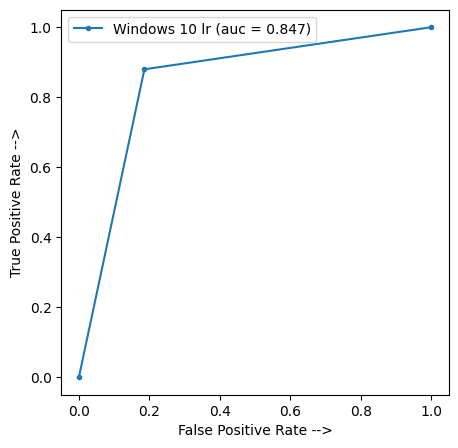

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

lr_fpr, lr_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_lr = auc(lr_fpr, lr_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Windows 10 lr (auc = %0.3f)' % auc_lr)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

[Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')]

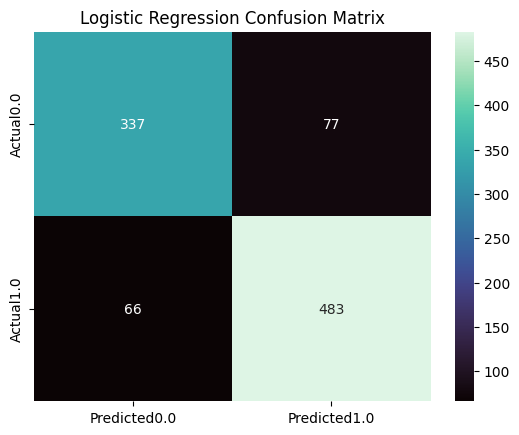

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako', ).set(title = 'Logistic Regression Confusion Matrix')

plot(y_test, y_pred_lr)

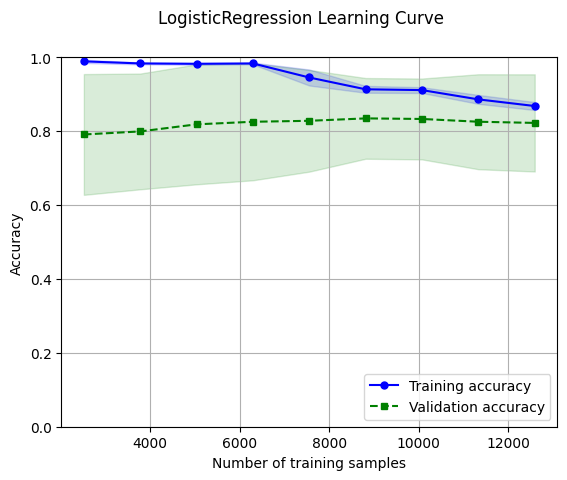

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

log_reg = LogisticRegression()


train_sizes, train_scores, test_scores = learning_curve(estimator=log_reg,
                                                       X=x_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=15,
                                                       n_jobs=-1)

# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.suptitle('LogisticRegression Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1.0])
plt.show()

In [ ]:
# from interpret.blackbox import LimeTabular
# from interpret import show
# # dtc = DecisionTreeClassifier()
# # dtc.fit(x_train, y_train)
# # y_pred = dtc.predict(x_test)
# # print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# # print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# # %% Apply lime
# # Initilize Lime for Tabular data
# lime = LimeTabular(predict_fn=knn.predict_proba, 
#                    data=x_train, 
#                    random_state=1)
# # Get local explanations
# lime_local = lime.explain_local(x_test[50:100], 
#                                 y_test[50:100], 
#                                 name='LIME')
# show(lime_local)

In [ ]:
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# # define models and parameters
# model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

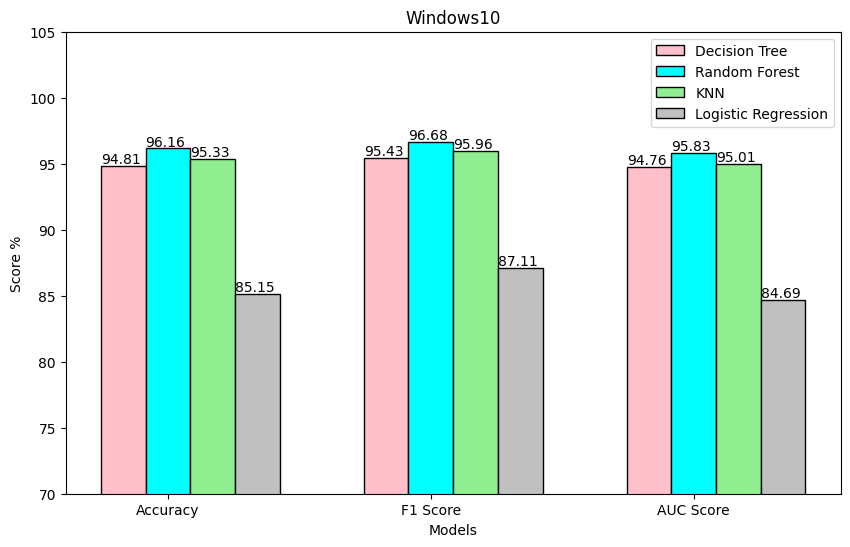

In [ ]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
dtc_scores = [dtcAccuracy, dtcF1, dtcAuc]
rfc_scores = [rfcAccuracy, rfcF1, rfcAuc]
KNN_scores = [knnAccuracy, knnF1, knnAuc]
LR_scores = [lrAccuracy, lrF1, lrAuc]

x_labels = ['Accuracy', 'F1 Score', 'AUC Score']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.19))

width = 0.17

x_dtc = [x-width for x in range (len(dtc_scores))]
x_rfc = [x for x in range (len(rfc_scores))]
x_KNN = [x+width for x in range (len(KNN_scores))]
x_LR = [x+(2*width) for x in range (len(LR_scores))]


fig,ax = plt.subplots(figsize = (10, 6))
rect1 = ax.bar(x_dtc ,dtc_scores, width, label='Decision Tree', color = 'pink', edgecolor='black')
rect2 = ax.bar(x_rfc, rfc_scores, width, label='Random Forest', color='cyan', edgecolor='black')
rect3 = ax.bar(x_KNN, KNN_scores, width, label='KNN', color='lightgreen', edgecolor='black')
rect4 = ax.bar(x_LR, LR_scores, width, label='Logistic Regression', color='silver', edgecolor='black')

plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Windows10')
ax.set_xlabel('Models')
ax.set_ylabel('Score %')
plt.ylim([70, 105])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
plt.show()

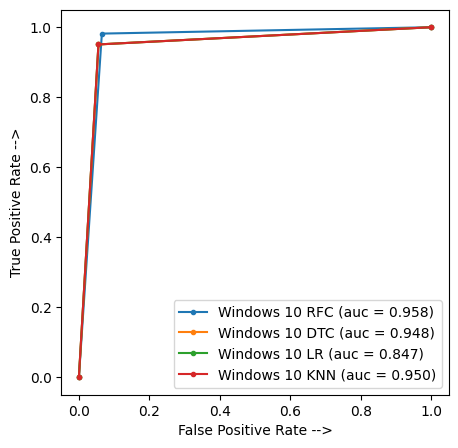

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
dtc_rfc = auc(dtc_fpr, dtc_tpr)

lr_fpr, lr_tpr, threshold = roc_curve(y_test, y_pred_dtc)
lr_rfc = auc(lr_fpr, lr_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_dtc)
knn_rfc = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Windows 10 RFC (auc = %0.3f)' % auc_rfc)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()

plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Windows 10 DTC (auc = %0.3f)' % auc_dtc)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()

plt.plot(lr_fpr, dtc_tpr, marker='.', label='Windows 10 LR (auc = %0.3f)' % auc_lr )
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()

plt.plot(knn_fpr, knn_tpr, marker='.', label='Windows 10 KNN (auc = %0.3f)' % auc_knn )

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()